Loading the Dataset, Helper Functions and Preprocessing


In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%matplotlib inline

In [ ]:
#Importing the necessary libraries
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = "0"
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from keras import regularizers, layers, Model
import scipy.io
from scipy.signal import find_peaks
import pickle

In [ ]:
import sys
# Add the path to your Python files to the system path
# WARNING: Each person has different file path!!!
# sys.path.append('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/')
sys.path.append('/content/drive/MyDrive/CEE286_Project')

# Now you can import your Python files
import preprocessing as PP

ModuleNotFoundError: No module named 'preprocessing'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# List functions in preprocessing module
pp_functions = [func for func in dir(PP) if callable(getattr(PP, func))]
print("Functions pp:", pp_functions)


Functions pp: ['convert_to_fft', 'find_peaks', 'generate_spectrogram', 'get_stats', 'load_mat_files_to_dfs', 'normalize', 'segment_signals', 'spectrogram']


In [ ]:
### Importing the Dataset in .mat format
## DONT RUN IT AGAIN
folder_path = "/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/car_new_with_correct_indices/mat_files"
dataframes_dict = PP.load_mat_files_to_dfs(folder_path, start_with='damaged', end_with='.mat')

undamaged_signals_df = dataframes_dict['0']
damaged_1_signals_df = dataframes_dict['1']
damaged_2_signals_df = dataframes_dict['2']

print("Undamaged Signals DF Shape:", undamaged_signals_df.shape)
print("Damaged 1 Signals DF Shape:", damaged_1_signals_df.shape)
print("Damaged 2 Signals DF Shape:", damaged_2_signals_df.shape)

In [ ]:
### Segment the the dataset with a particular window length and step size, also these segments are NaN filtered
## DONT RUN IT AGAIN
WINDOW_SIZE = 2000
STEP_SIZE = 400
undamaged_segments_df = PP.segment_signals(undamaged_signals_df, window_size= WINDOW_SIZE, step_size=STEP_SIZE)
damaged_1_segments_df = PP.segment_signals(damaged_1_signals_df, window_size= WINDOW_SIZE, step_size=STEP_SIZE)
damaged_2_segments_df = PP.segment_signals(damaged_2_signals_df, window_size= WINDOW_SIZE, step_size=STEP_SIZE)

print("Undamaged Segments DF Shape:", undamaged_segments_df.shape)
print("Damaged 1 Segments DF Shape:", damaged_1_segments_df.shape)
print("Damaged 2 Segments DF Shape:", damaged_2_segments_df.shape)

Undamaged Segments DF Shape: (2000, 6478)
Damaged 1 Segments DF Shape: (2000, 5666)
Damaged 2 Segments DF Shape: (2000, 5658)


In [ ]:
## DONT RUN IT AGAIN
np.save('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_npy_files/undamaged_segmented_window_2000_step_400.npy', undamaged_segments_df)
np.save('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_npy_files/damaged_1_segmented_window_1000_step_400.npy', damaged_1_segments_df)
np.save('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_npy_files/damaged_2_segmented_window_1000_step_400.npy', damaged_2_segments_df)

In [ ]:
#RUN THIS DIRECTLY For Future Use This Directly Instead of running the segmentation again
# undamaged_segments_df = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_npy_files/undamaged_segmented_window_2000_step_400.npy')
# damaged_1_segments_df = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_npy_files/damaged_1_segmented_window_1000_step_400.npy')
# damaged_2_segments_df = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_npy_files/damaged_2_segmented_window_1000_step_400.npy')

undamaged_segments_df = np.load('/content/drive/MyDrive/CEE286_Project/segmented_npy_files/undamaged_segmented_window_2000_step_400.npy')
damaged_1_segments_df = np.load("/content/drive/MyDrive/CEE286_Project/segmented_npy_files/damaged_1_segmented_window_1000_step_400.npy")
damaged_2_segments_df = np.load('/content/drive/MyDrive/CEE286_Project/segmented_npy_files/damaged_2_segmented_window_1000_step_400.npy')


# Convert the NumPy arrays to pandas DataFrames
undamaged_segments_df = pd.DataFrame(undamaged_segments_df)
damaged_1_segments_df = pd.DataFrame(damaged_1_segments_df)
damaged_2_segments_df = pd.DataFrame(damaged_2_segments_df)

print("Undamaged Segments DF Shape:", undamaged_segments_df.shape)
print("Damaged 1 Segments DF Shape:", damaged_1_segments_df.shape)
print("Damaged 2 Segments DF Shape:", damaged_2_segments_df.shape)


Undamaged Segments DF Shape: (2000, 6478)
Damaged 1 Segments DF Shape: (2000, 5666)
Damaged 2 Segments DF Shape: (2000, 5658)


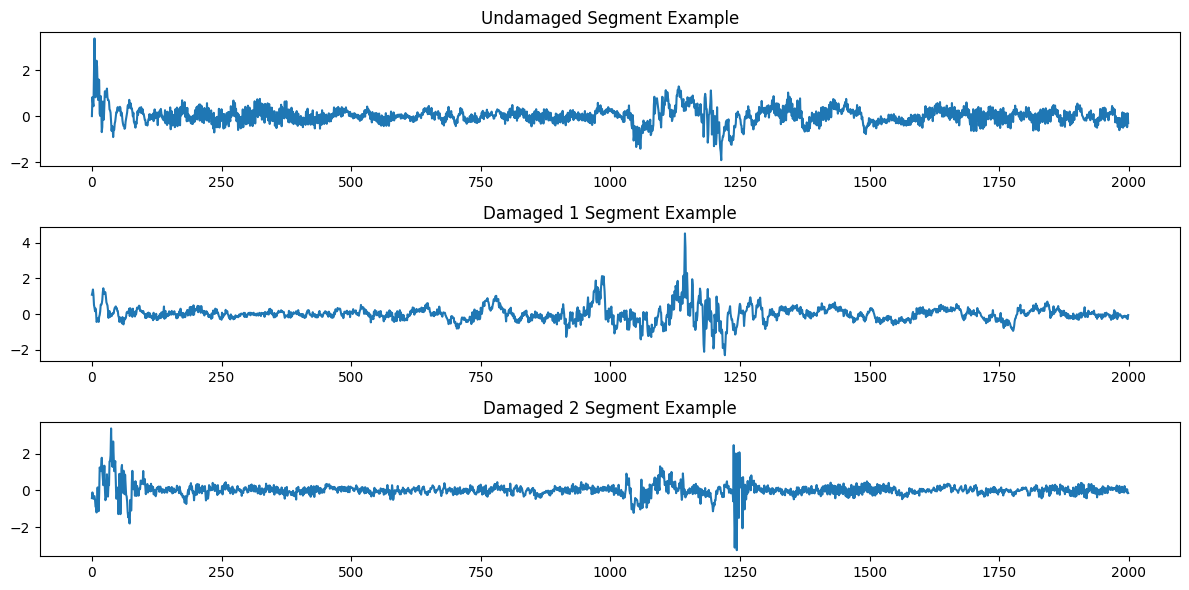

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(undamaged_segments_df.iloc[:,1])
plt.title('Undamaged Segment Example')

plt.subplot(3, 1, 2)
plt.plot(damaged_1_segments_df.iloc[:,1])
plt.title('Damaged 1 Segment Example')

plt.subplot(3, 1, 3)
plt.plot(damaged_2_segments_df.iloc[:,1])
plt.title('Damaged 2 Segment Example')

plt.tight_layout()
plt.show()


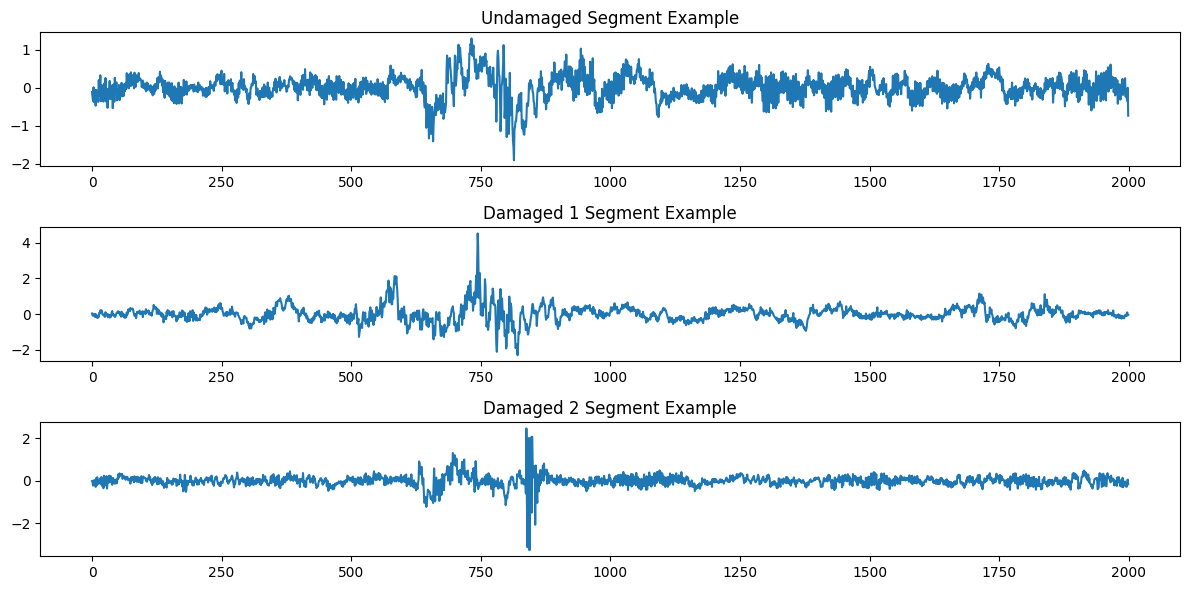

In [ ]:
# next step plots
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(undamaged_segments_df.iloc[:,2])
plt.title('Undamaged Segment Example')

plt.subplot(3, 1, 2)
plt.plot(damaged_1_segments_df.iloc[:,2])
plt.title('Damaged 1 Segment Example')

plt.subplot(3, 1, 3)
plt.plot(damaged_2_segments_df.iloc[:,2])
plt.title('Damaged 2 Segment Example')

plt.tight_layout()
plt.show()


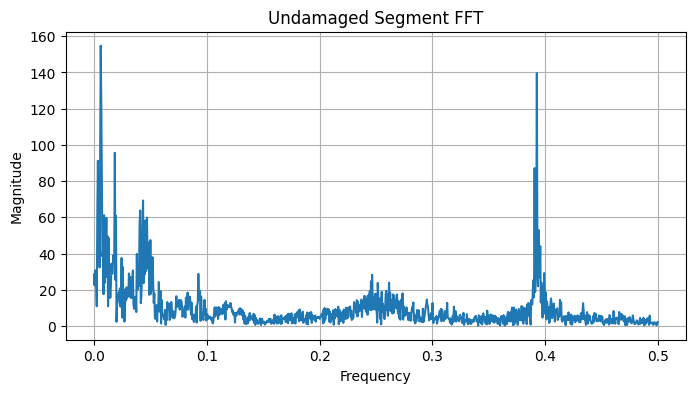

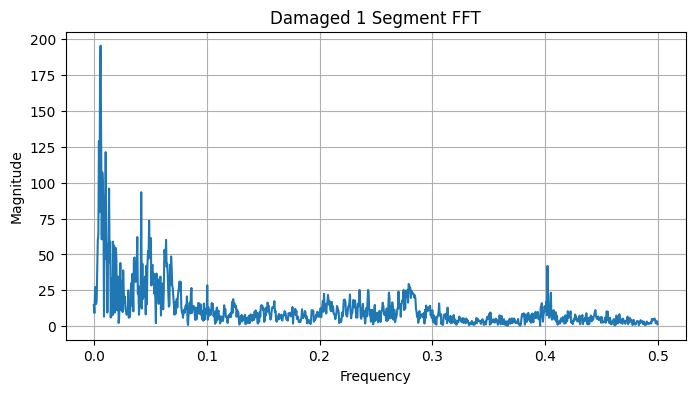

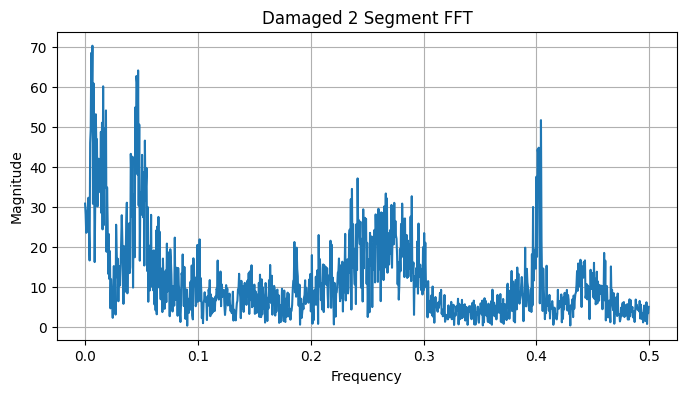

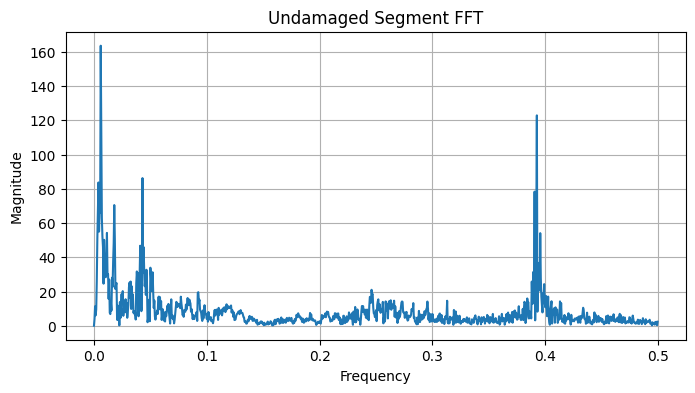

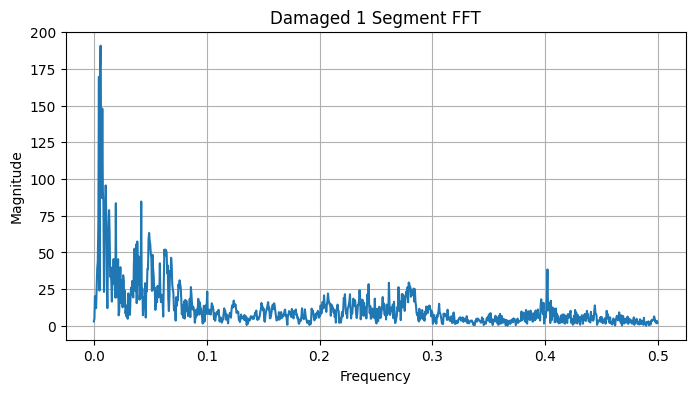

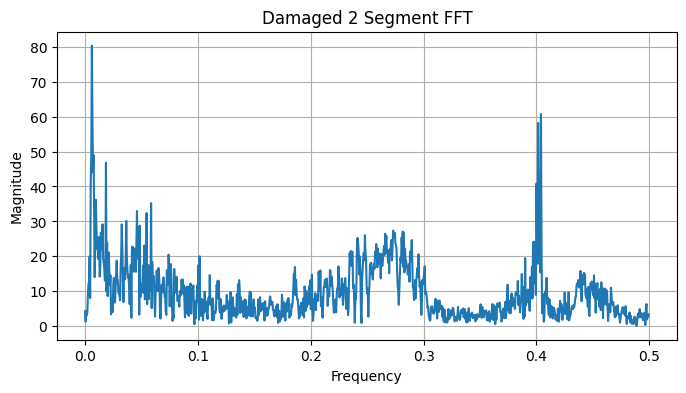

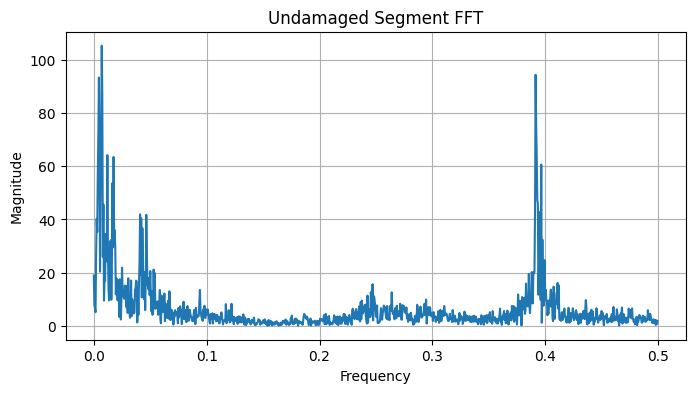

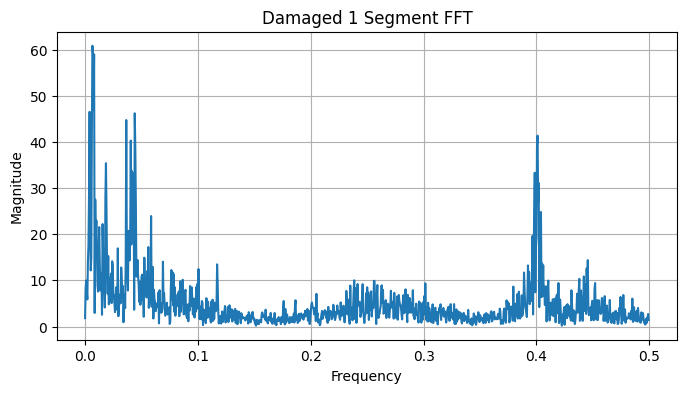

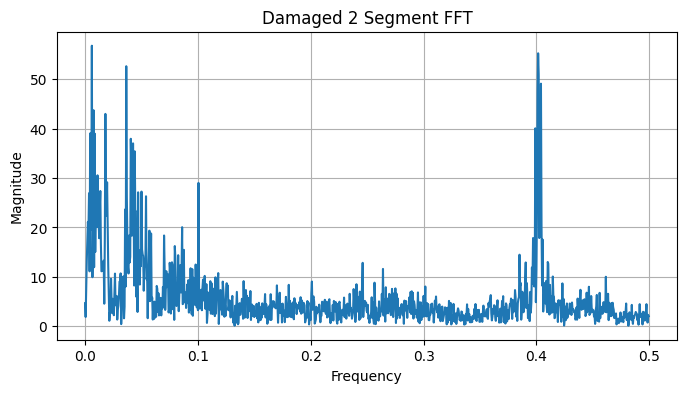

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

def plot_fft(data, title):
  # Calculate FFT
  fft_values = np.fft.fft(data)
  frequencies = np.fft.fftfreq(len(data))

  # Plot FFT
  plt.figure(figsize=(8, 4))
  plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values)[:len(frequencies)//2])
  plt.title(title)
  plt.xlabel('Frequency')
  plt.ylabel('Magnitude')
  plt.grid(True)
  plt.show()


# Plot FFT for each time-series example
plot_fft(undamaged_segments_df.iloc[:, 1], 'Undamaged Segment FFT')
plot_fft(damaged_1_segments_df.iloc[:, 1], 'Damaged 1 Segment FFT')
plot_fft(damaged_2_segments_df.iloc[:, 1], 'Damaged 2 Segment FFT')

plot_fft(undamaged_segments_df.iloc[:, 2], 'Undamaged Segment FFT')
plot_fft(damaged_1_segments_df.iloc[:, 2], 'Damaged 1 Segment FFT')
plot_fft(damaged_2_segments_df.iloc[:, 2], 'Damaged 2 Segment FFT')

plot_fft(undamaged_segments_df.iloc[:, 10], 'Undamaged Segment FFT')
plot_fft(damaged_1_segments_df.iloc[:, 10], 'Damaged 1 Segment FFT')
plot_fft(damaged_2_segments_df.iloc[:, 10], 'Damaged 2 Segment FFT')



Autoencoder - Extracting the generalised features from the Dataset


In [ ]:
# Concatenate along columns (axis=1) since rows (features) are the same
merged_input_data = pd.concat([undamaged_segments_df, damaged_1_segments_df, damaged_2_segments_df], axis=1)

print("Final Merged Data Shape:", merged_input_data.shape)

Final Merged Data Shape: (2000, 17802)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (95% train, 5% test)
input_train, input_test= train_test_split(
    merged_input_data.T, test_size=0.05, random_state=42
)

print("Input train shape:", input_train.shape)
print("Input test shape:", input_test.shape)

Input train shape: (16911, 2000)
Input test shape: (891, 2000)


In [ ]:
# Input layer
data = input_train.T
input_layer = keras.Input(shape=(data.shape[0],))
print(data.shape[0])

2000


In [ ]:
def linear_autoencoder(input_layer, encoding_dim, num_layers, learning_rate, regularization_constant):
  # Creates a linear autoencoder model with the number of encoding and decoding layers to be equal to num_layers each
  n = num_layers
  #Encoding layers
  encoded = layers.Dense(int(encoding_dim*(1.2**n)),
                         activation='tanh',
                         kernel_regularizer = regularizers.l2(regularization_constant))(input_layer)
  encoded = layers.BatchNormalization()(encoded)
  n-=1
  while n>0:
    encoded = layers.Dense(int(encoding_dim*(1.2**n)),
                           activation='tanh',
                           kernel_regularizer = regularizers.l2(regularization_constant))(encoded)
    encoded = layers.BatchNormalization()(encoded)
    n-=1

  #Bottleneck Layer/latent Space
    ##dimension = encoding_dim, tanh to keep the values between -1 and +1
  bottleneck = layers.Dense(encoding_dim,
                            activation='tanh',
                            kernel_regularizer = regularizers.l2(regularization_constant))(encoded)
  bottleneck = layers.BatchNormalization()(bottleneck)
  n+=1

  #Decoding layers
  decoded = layers.Dense(int(encoding_dim*(1.2**n)),
                         activation='tanh',
                         kernel_regularizer = regularizers.l2(regularization_constant))(bottleneck)
  decoded = layers.BatchNormalization()(decoded)
  n+=1
  while n<=num_layers:
    decoded = layers.Dense(int(encoding_dim*(1.2**n)),
                           activation='tanh',
                           kernel_regularizer = regularizers.l2(regularization_constant))(decoded)
    decoded = layers.BatchNormalization()(decoded)
    n+=1

  output_layer = layers.Dense(data.shape[0], activation='linear')(decoded)
    # Output activation set to linear for reconstruction
  model = keras.Model(input_layer, output_layer)

  # Compiling model with the Adam optimizer and learning rate
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='mse')

  return model

In [ ]:
!pip install optuna

In [ ]:
# Tuning the model using Optuna
import optuna
from sklearn.model_selection import train_test_split
import keras

def objective(trial):
    # Hyperparameter search space
    # encoding_dim = trial.suggest_int('encoding_dim', 500, 505)
    encoding_dim = 500
    num_layers = trial.suggest_int('num_layers', 2 , 4)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    regularization_constant = trial.suggest_float('regularization_constant', 1e-5, 1e-2, log=True)

    # Build the model
    input_layer = keras.Input(shape=(data.shape[0],))
    model = linear_autoencoder(input_layer, encoding_dim, num_layers, learning_rate, regularization_constant)

    # Train/validation split
    X_train, X_val = train_test_split(data.T, test_size=0.1, random_state=42)

    # Train the model
    history = model.fit(
        X_train, X_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_val, X_val),
        verbose=0
    )

    # Return validation loss as the optimization metric
    val_loss = history.history['val_loss'][-1]
    return val_loss

In [ ]:
# Create an Optuna study and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=25)

# Best parameters and loss
print("Best parameters:", study.best_params)
print("Best validation loss:", study.best_value)

[I 2025-03-05 06:02:28,665] A new study created in memory with name: no-name-e10255ba-5518-46e4-84b4-065c5d9ef971
[I 2025-03-05 06:02:53,890] Trial 0 finished with value: 0.08490949124097824 and parameters: {'num_layers': 2, 'learning_rate': 0.0003088802847118687, 'regularization_constant': 0.00018391628683497133}. Best is trial 0 with value: 0.08490949124097824.
[I 2025-03-05 06:03:23,264] Trial 1 finished with value: 0.1415799856185913 and parameters: {'num_layers': 3, 'learning_rate': 0.002161140192994955, 'regularization_constant': 4.458186482487894e-05}. Best is trial 0 with value: 0.08490949124097824.
[I 2025-03-05 06:04:05,164] Trial 2 finished with value: 0.1872631162405014 and parameters: {'num_layers': 4, 'learning_rate': 0.0013476321172318244, 'regularization_constant': 0.0016390289448816417}. Best is trial 0 with value: 0.08490949124097824.
[I 2025-03-05 06:04:39,751] Trial 3 finished with value: 0.12964685261249542 and parameters: {'num_layers': 3, 'learning_rate': 0.00494

Best parameters: {'num_layers': 2, 'learning_rate': 0.00012888294544822435, 'regularization_constant': 0.0004965986908068895}
Best validation loss: 0.07552152872085571


In [ ]:
best_params = study.best_params
# best_encoding_dim = best_params['encoding_dim']
best_encoding_dim = 500
best_num_layers = best_params['num_layers']
best_learning_rate = best_params['learning_rate']
best_regularization_constant = best_params['regularization_constant']
print("\nBest encoding_dim:", best_encoding_dim,
      "\nBest num_layers:", best_num_layers,
      "\nBest learning_rate:", best_learning_rate,
      "\nBest regularization_constant:", best_regularization_constant)


Best encoding_dim: 500 
Best num_layers: 2 
Best learning_rate: 0.00012888294544822435 
Best regularization_constant: 0.0004965986908068895


In [ ]:
#To not repeat the Optuna Study Again

best_encoding_dim = 500
best_num_layers = 2
best_learning_rate = 0.00015847207397798885
best_regularization_constant = 0.002289251399182091

In [ ]:
linear_autoencoder_model = linear_autoencoder(input_layer, best_encoding_dim, best_num_layers, best_learning_rate, best_regularization_constant)
linear_autoencoder_model.summary()

Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_366 (Dense)                    │ (None, 720)                 │       1,440,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_313              │ (None, 720)                 │           2,880 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_367 (Dense)                    │ (None, 600)                 │         432,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_314              │ (None, 600)                 │           2,400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_368 (Dense)                    │ (None, 500)                 │         300,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_315              │ (None, 500)                 │           2,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_369 (Dense)                    │ (None, 600)                 │         300,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_316              │ (None, 600)                 │           2,400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_370 (Dense)                    │ (None, 720)                 │         432,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_317              │ (None, 720)                 │           2,880 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_371 (Dense)                    │ (None, 2000)                │       1,442,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,361,700 (16.64 MB)

 Trainable params: 4,355,420 (16.61 MB)

 Non-trainable params: 6,280 (24.53 KB)

In [ ]:
# Train/validation split
X_train, X_val = train_test_split(data.T, test_size=0.1, random_state=42)

# Train the model
history = linear_autoencoder_model.fit(
    X_train, X_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, X_val),
    verbose=1
)


Epoch 1/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 1.6955 - val_loss: 0.6837
Epoch 2/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5096 - val_loss: 0.1986
Epoch 3/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1641 - val_loss: 0.1156
Epoch 4/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1072 - val_loss: 0.0968
Epoch 5/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0946 - val_loss: 0.0946
Epoch 6/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0915 - val_loss: 0.0885
Epoch 7/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0877 - val_loss: 0.0851
Epoch 8/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0858 - val_loss: 0.0842
Epoch 9/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0845 - val_loss: 0.0850
Epoch 10/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0853 - val_loss: 0.0820


In [ ]:
# Save the model
# model_save_path = '/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/trained_models/linear_autoencoder_model_baseline_carnew.keras'
model_save_path = '/content/drive/MyDrive/CEE286_Project/trained_models/linear_autoencoder_model_baseline_carnew.keras'
linear_autoencoder_model.save(model_save_path)

print(f"Model saved to: {model_save_path}")

Model saved to: /content/drive/MyDrive/CEE286_Project/trained_models/linear_autoencoder_model_baseline_carnew.keras


In [ ]:
# Load the saved model
# model_save_path = '/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/trained_models/linear_autoencoder_model_baseline_carnew.keras'
model_save_path = '/content/drive/MyDrive/CEE286_Project/trained_models/linear_autoencoder_model_baseline_carnew.keras'

linear_autoencoder_model = keras.models.load_model(model_save_path)

# Further training
history = linear_autoencoder_model.fit(
    X_train, X_train,
    epochs= 500,  # Adjust the number of epochs as needed
    batch_size=64,
    validation_data=(X_val, X_val),
    verbose=1
)

# Save the further trained model
linear_autoencoder_model.save(model_save_path)

print(f"Further trained model saved to: {model_save_path}")

Epoch 1/500
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0670 - val_loss: 0.0689
Epoch 2/500
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0656 - val_loss: 0.0672
Epoch 3/500
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0661 - val_loss: 0.0681
Epoch 4/500
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0659 - val_loss: 0.0695
Epoch 5/500
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0659 - val_loss: 0.0673
Epoch 6/500
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0657 - val_loss: 0.0680
Epoch 7/500
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0657 - val_loss: 0.0683
Epoch 8/500
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0656 - val_loss: 0.0687
Epoch 9/500
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0667 - val_loss: 0.0687
Epoch 10/500
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0657 - val_loss: 0.0696
Epoch 11/500
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0653 - val_loss: 0.0678
Epoch 12/500
238/238 ━━━━━━━━━━━━━━━━━━━

In [ ]:

# model_save_path = '/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/trained_models/linear_autoencoder_model_baseline_carnew.keras'
model_save_path = '/content/drive/MyDrive/CEE286_Project/trained_models/linear_autoencoder_model_baseline_carnew.keras'
linear_autoencoder_model = keras.models.load_model(model_save_path)

# Evaluate the model on the test set
test_loss = linear_autoencoder_model.evaluate(input_test, input_test, verbose=0)

print(f"Test set loss: {test_loss}")


Test set loss: 0.18523363769054413


In [ ]:

linear_autoencoder_model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_176 (Dense)                    │ (None, 2000)                │       4,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_151              │ (None, 2000)                │           8,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 1000)                │       2,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_152              │ (None, 1000)                │           4,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_153              │ (None, 500)                 │           2,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 1000)                │         501,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_154              │ (None, 1000)                │           4,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 2000)                │       2,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_155              │ (None, 2000)                │           8,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 2000)                │       4,002,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,077,502 (149.07 MB)

 Trainable params: 13,021,500 (49.67 MB)

 Non-trainable params: 13,000 (50.78 KB)

 Optimizer params: 26,043,002 (99.35 MB)

In [ ]:
linear_autoencoder_model.layers

[<InputLayer name=input_layer, built=True>,
 <Dense name=dense_176, built=True>,
 <BatchNormalization name=batch_normalization_151, built=True>,
 <Dense name=dense_177, built=True>,
 <BatchNormalization name=batch_normalization_152, built=True>,
 <Dense name=dense_178, built=True>,
 <BatchNormalization name=batch_normalization_153, built=True>,
 <Dense name=dense_179, built=True>,
 <BatchNormalization name=batch_normalization_154, built=True>,
 <Dense name=dense_180, built=True>,
 <BatchNormalization name=batch_normalization_155, built=True>,
 <Dense name=dense_181, built=True>]

In [ ]:
# Get the encoder part of the model
bottleneck_layer_index = len(linear_autoencoder_model.layers) // 2  # by symmetry in encoder/decoder getting the index of the bottleneck layer
print(bottleneck_layer_index)
print(linear_autoencoder_model.layers[bottleneck_layer_index])


6
<BatchNormalization name=batch_normalization_153, built=True>


In [ ]:
# Get the encoder part of the model
encoder = keras.Model(inputs=linear_autoencoder_model.input,
                      outputs=linear_autoencoder_model.layers[bottleneck_layer_index].output)

# Save the encoder model
# encoder_save_path = '/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/trained_models/encoder_model_baseline_carnew.keras'
encoder_save_path = '/content/drive/MyDrive/CEE286_Project/trained_models/encoder_model_baseline_carnew.keras'
encoder.save(encoder_save_path)
print(f"Encoder saved to: {encoder_save_path}")


Encoder saved to: /content/drive/MyDrive/CEE286_Project/trained_models/encoder_model_baseline_carnew.keras


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the encoder part of the model
# encoder_save_path = '/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/trained_models/encoder_model_baseline_carnew.keras'
encoder_save_path = '/content/drive/MyDrive/CEE286_Project/trained_models/encoder_model_baseline_carnew.keras
encoder = keras.models.load_model(encoder_save_path)

latent_space = encoder.predict(merged_input_data.T)
# Convert the latent space to a DataFrame for easier handling
latent_space_df = pd.DataFrame(latent_space, columns=[f'Dim {i+1}' for i in range(latent_space.shape[1])])

# Plot pairwise scatter plots using seaborn
plt.figure(figsize=(12, 12))
sns.pairplot(latent_space_df, diag_kind='kde', plot_kws={'s': 10, 'alpha': 0.7})
plt.suptitle('Pairwise Scatter Plots of Latent Space Dimensions', y=1.02)
plt.show()

In [ ]:
def mse_to_percentage_error(mse, data_range):
  """Calculates the percentage error based on MSE and data range.

  Args:
    mse: The mean squared error.
    data_range: The range of the data (max - min).

  Returns:
    The percentage error.
  """
  rmse = np.sqrt(mse)
  percentage_error = (rmse / data_range) * 100
  return percentage_error

#train set error
train_mse_error = linear_autoencoder_model.evaluate(input_train, input_train)
print(f"Train MSE Error: {train_mse_error:.2f}")

# Calculate the percentage error
data_min = np.min(input_train)
data_max = np.max(input_train)
data_range = data_max - data_min

train_percentage_error = mse_to_percentage_error(train_mse_error, data_range)
print(f"Train Percentage Error: {train_percentage_error:.2f}%")

# #Validation set error
# val_mse_error = history.history['val_loss'][-1]
# print(f"Validation MSE Error: {val_mse_error:.2f}")

# Calculate the percentage error
data_min = np.min(input_train)
data_max = np.max(input_train)
data_range = data_max - data_min

# val_percentage_error = mse_to_percentage_error(val_mse_error, data_range)
# print(f"Validation Percentage Error: {val_percentage_error:.2f}%")

#test set error
test_mse_error = linear_autoencoder_model.evaluate(input_test, input_test)
print(f"Test MSE Error: {test_mse_error:.2f}")

# Calculate the percentage error
data_min = np.min(input_test)
data_max = np.max(input_test)
data_range = data_max - data_min

test_percentage_error = mse_to_percentage_error(test_mse_error, data_range)
print(f"Test Percentage Error: {test_percentage_error:.2f}%")

529/529 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0577
Train MSE Error: 0.06
Train Percentage Error: 0.87%
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0577
Test MSE Error: 0.06
Test Percentage Error: 1.29%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
(8, 2000)
(8, 2000)


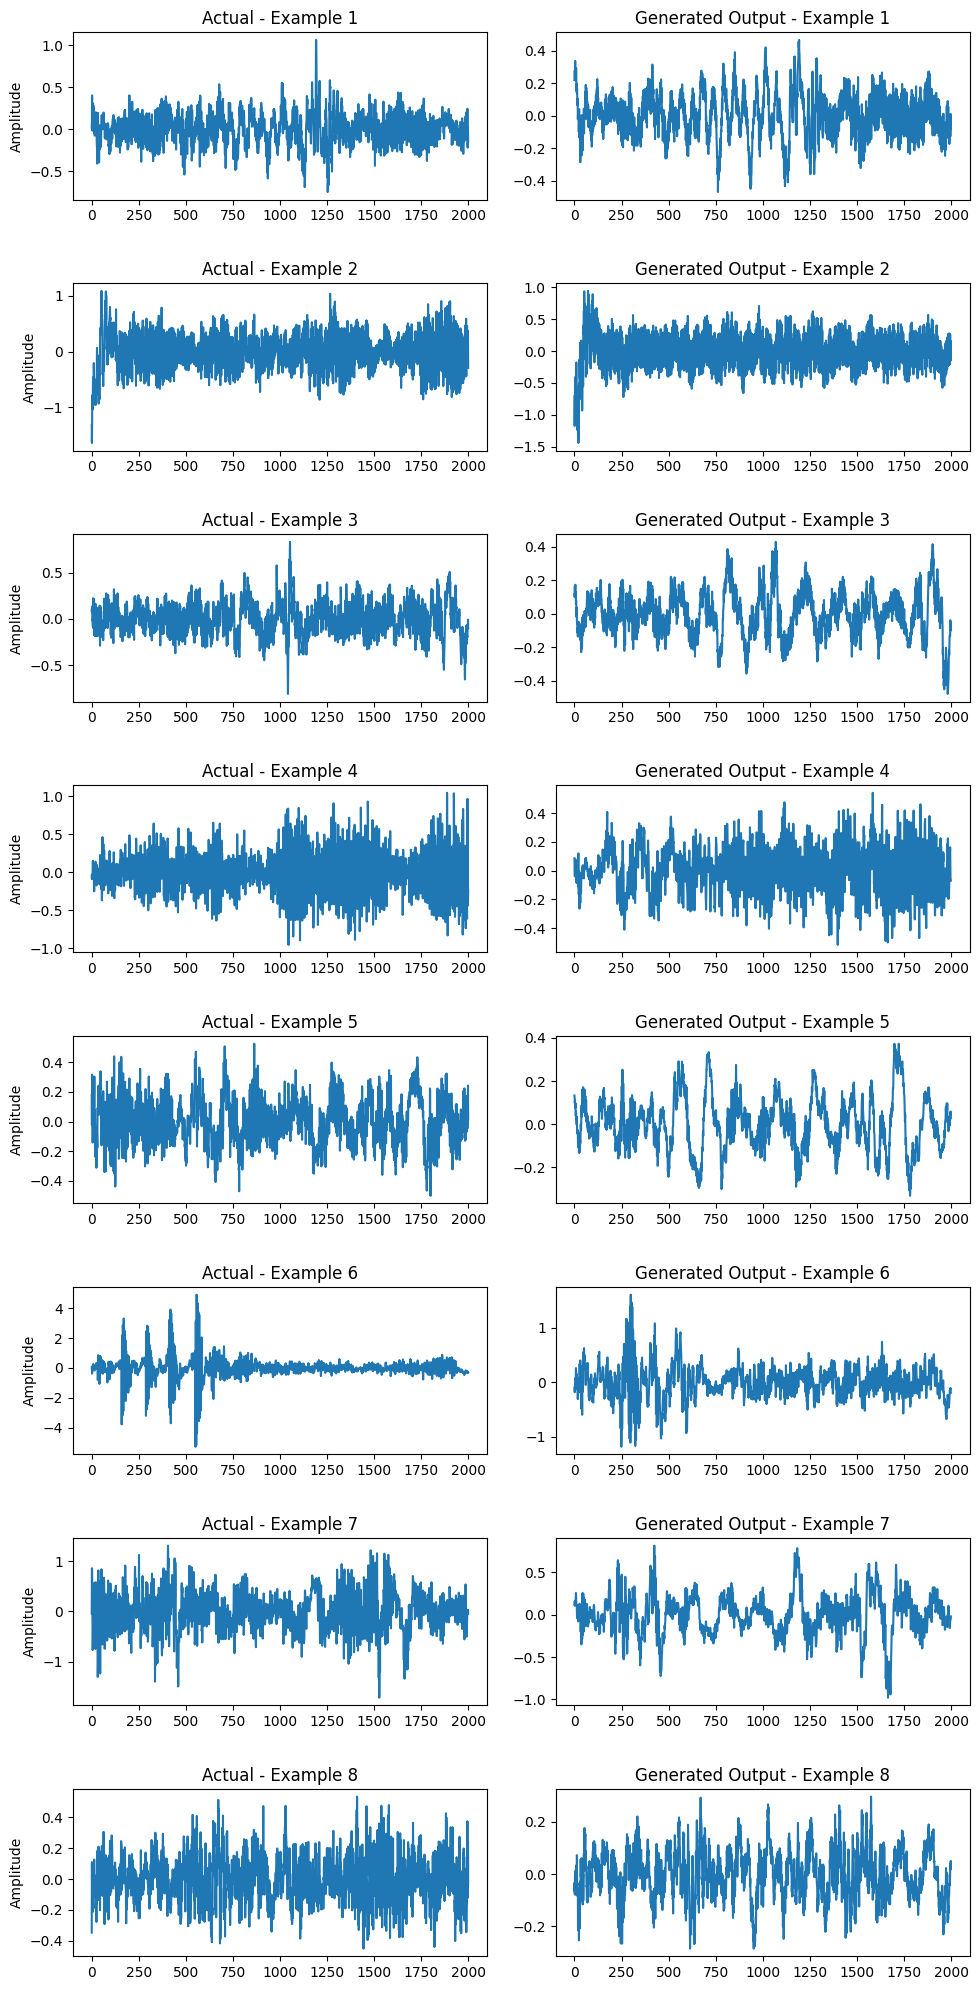

In [ ]:
# Generate predictions for the first 8 examples
first_eight_inputs = input_train[2000:2008]
predictions = linear_autoencoder_model.predict(first_eight_inputs)
# first_eight_inputs = first_eight_inputs.T
print(first_eight_inputs.shape)
print(predictions.shape)
# Generate time indices based on input shape
latent_features = np.arange(first_eight_inputs.shape[1])

# Create subplots (8 rows, 2 columns)
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10, 20))

# Plot original vs. predicted for each example
for i in range(8):
    axes[i, 0].plot(latent_features, first_eight_inputs.iloc[i].to_numpy())
    axes[i, 0].set_title(f"Actual - Example {i+1}")
    axes[i, 0].set_ylabel("Amplitude")

    axes[i, 1].plot(latent_features, predictions[i])
    axes[i, 1].set_title(f"Generated Output - Example {i+1}")

# Improve layout spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Adds spacing between rows
plt.show()

In [ ]:
first_eight_inputs = input_train[2000:2008]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
(8, 2000)
(8, 2000)


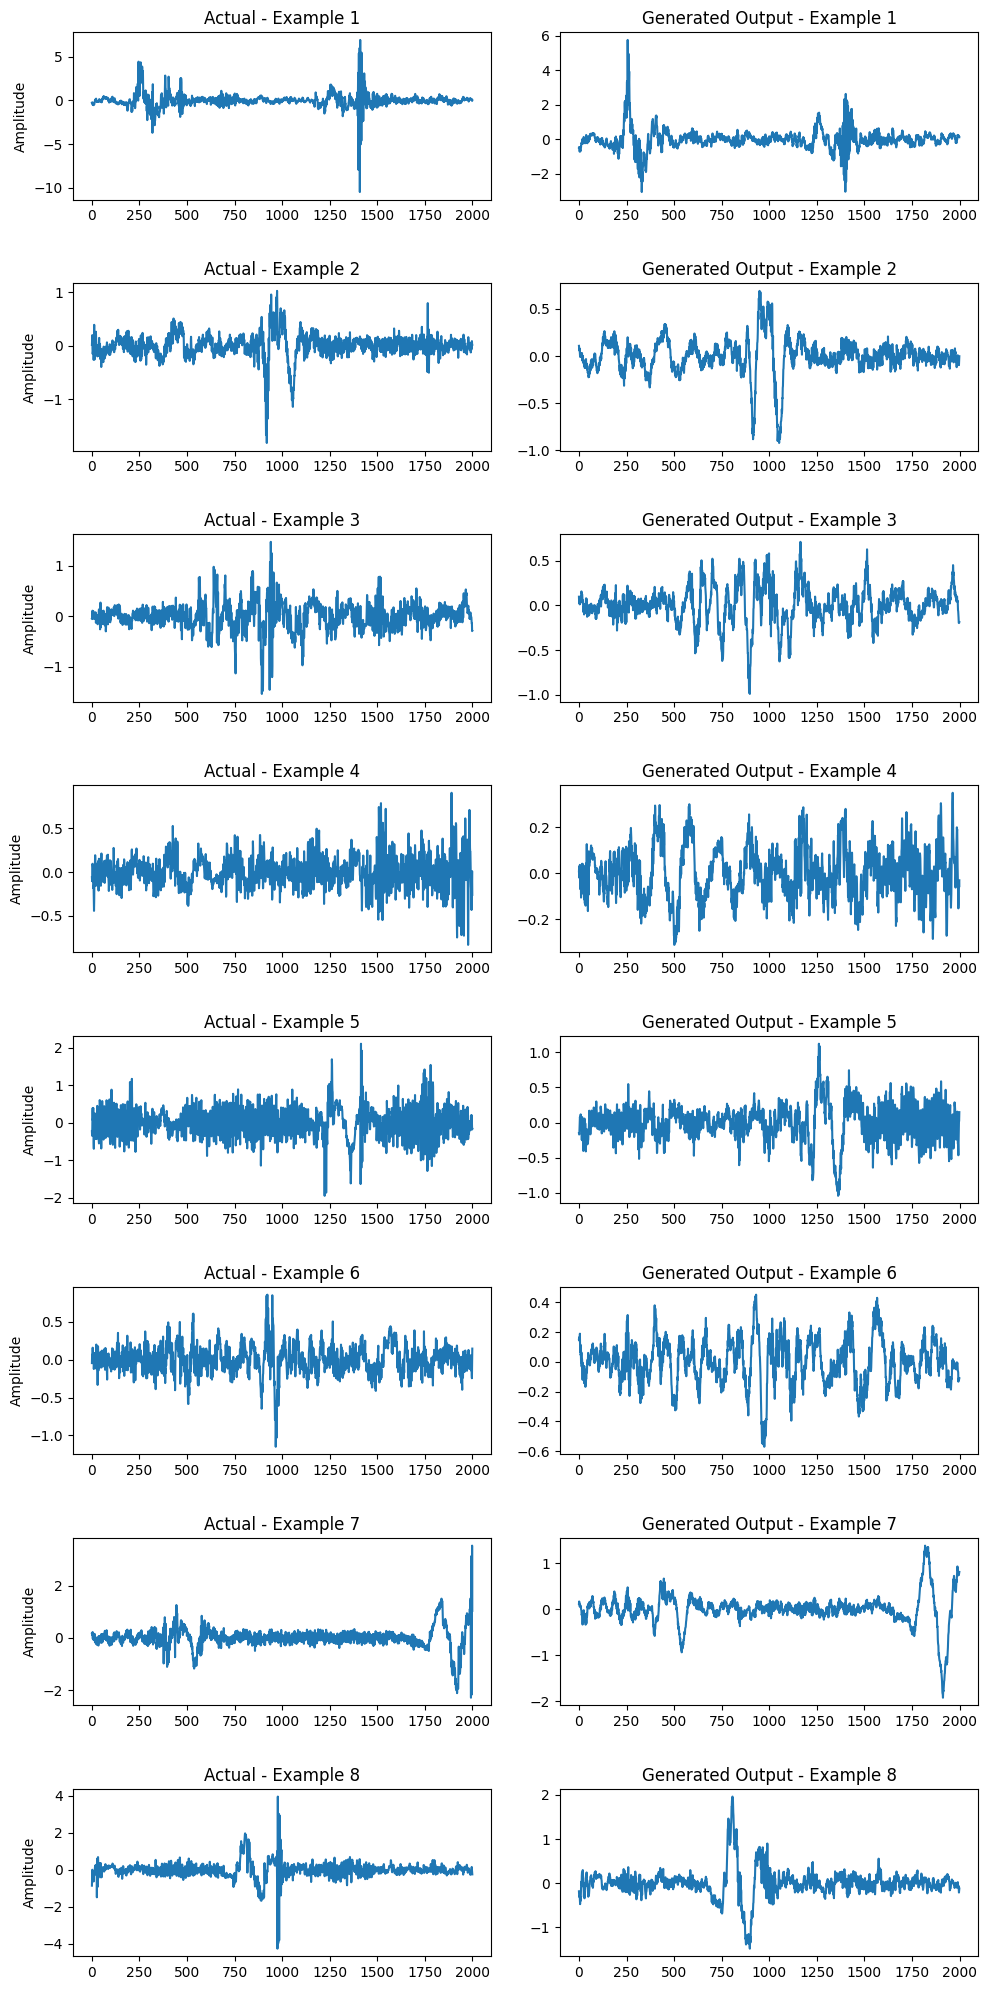

In [ ]:
# Generate predictions for the first 8 examples- Test Set
first_eight_inputs = input_test[:8]
predictions = linear_autoencoder_model.predict(first_eight_inputs)
# first_eight_inputs = first_eight_inputs.T
print(first_eight_inputs.shape)
print(predictions.shape)
# Generate time indices based on input shape
latent_features = np.arange(first_eight_inputs.shape[1])

# Create subplots (8 rows, 2 columns)
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10, 20))

# Plot original vs. predicted for each example
for i in range(8):
    axes[i, 0].plot(latent_features, first_eight_inputs.iloc[i].to_numpy())
    axes[i, 0].set_title(f"Actual - Example {i+1}")
    axes[i, 0].set_ylabel("Amplitude")

    axes[i, 1].plot(latent_features, predictions[i])
    axes[i, 1].set_title(f"Generated Output - Example {i+1}")

# Improve layout spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Adds spacing between rows
plt.show()

In [ ]:
# Compute the residual of the model
model_save_path = '/content/drive/MyDrive/CEE286_Project/trained_models/linear_autoencoder_model_baseline_carnew.keras'
linear_autoencoder_model = keras.models.load_model(model_save_path)

x_train_pred = linear_autoencoder_model.predict(input_train)
x_train_residual = input_train - x_train_pred

x_test_pred = linear_autoencoder_model.predict(input_test)
x_test_residual = input_test - x_test_pred

# Save residual to the drive
np.save('/content/drive/MyDrive/CEE286_Project/segmented_npy_files/x_train_residual.npy', x_train_residual)
np.save('/content/drive/MyDrive/CEE286_Project/segmented_npy_files/x_test_residual.npy', x_test_residual)

529/529 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
